<a href="https://colab.research.google.com/github/adelrio89/data_science_for_public_policy/blob/master/Tarea_1_Gesti%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Tarea 1</center></h1>
<center>Fecha de Entrega: Domingo 20 de junio - 23:59:00</center> 


<p align="justify"> En las clases de gestión de datos hemos aprendido acerca de la eficiencia de bases de datos, modelos relacionales, visualizar información y unir diferentes bases de datos para obtener la mayor información posible. Esta tarea consistirá de dos preguntas las cuales deberá responder de forma completa (código, texto e imágenes explicativas). Puede entregar la tarea en el formato, que estime conveniente (doc, pdf, script de R, url de Colab) pero tenga en cuenta que debe adjuntar el código utilizado. Se recomienda el uso de Colab R.<p>

In [23]:
system("gdown https://drive.google.com/uc?id=1aARNSlskNDlnp95AMIfAnTQJticwxzVD")
system("gdown https://drive.google.com/uc?id=1mdr2SpmggrOQAOUDIUjRyE1hul_7YyY6")

In [24]:
rendim2017 <- read.csv("20180213_Rendimiento_2017_20180131_PUBL.csv", sep=";")
rendim2018 <- read.csv("20190220_Rendimiento_2018_20190131_PUBL.csv", sep=";")

In [25]:
columnas2017 <- paste(names(rendim2017), "2017", sep = "_")
columnas2018 <- paste(names(rendim2018), "2018", sep = "_")

rendim_17_18 <- data.frame(matrix(ncol = 71, nrow = 0))
nombres_columnas <- c(columnas2017, columnas2018)
colnames(rendim_17_18) <- nombres_columnas

#Problema 1 (1.5 Pts)

En el taller, revisamos el siguiente código para hacer un join de dos bases de datos que compartieran un identificador.

In [74]:
#install.packages("tictoc")
library(tictoc)
tic()
ciclo1 <- 3000
ciclo2 <- 3000
n <- 1
paginas <- 0
for(i in 1:ciclo1){
  mrun <- rendim2017$mrun[i]
  if(i %% 10 == 0){
    paginas = paginas + 1
  }
  for(j in 1:ciclo2){
    if(j %% 10 == 0){
      paginas = paginas + 1
    }
    mrun2 <- rendim2018$MRUN[j]
      if(mrun == mrun2){
        fila <- c(as.character(rendim2017[i,]), as.character(rendim2018[j,]))
        rendim_17_18[n, ] <- fila
        n <- n+1
    }
  }
}
toc()
print(paste0("Número de páginas: ", as.character(paginas)))
print(paste0("Número de tuplas resultado join: ", as.character(nrow(rendim_17_18))))

17.609 sec elapsed
[1] "Número de páginas: 900300"
[1] "Número de tuplas resultado join: 1794"


<p align="justify">Suponga que usted tiene un disco duro con dos bases de datos con 3000 filas cada una que ocupan 300 paginas de disco cada una, en otras palabras cada 
pagina tiene 10 tuplas. Por otro lado usted tiene una memoria RAM de 101 páginas de almacenamiento.

(a) (0.5 pts) Dibuje el diagrama de flujo del algoritmo.<p>

**Debido al tamaño del flujograma, decidí incluir apenas el enlace al archivo en mi Drive.**

[Flujograma](https://drive.google.com/uc?id=13fDQxkaoGs3IHG6c5pkPICEw2P4qgOe9)


(b) (0.5 pts) Cuente la cantidad de paginas que se deben ir a buscar desde el disco duro para almacenarlas
en memoria de la forma que está escrito actualmente el algoritmo.

[Lecturas - Algoritmo Original](https://drive.google.com/uc?id=1ToURcDZm8MTZJD3FFh5fz9VDfkNkOdVW)


<p align="justify">El algoritmo que hace el join entre las dos bases (rendim2017 y rendim2018) es conocido como nested for loop, precisamente porque contiene dos for anidados (uno dentro de otro). El algoritmo compara cada uno de los primeros 3000 elementos de rendim2017 (BD1) con los primeros 3000 de rendim2018 (BD2); es decir, se hacen 9'000.0000 de comparaciones (3000 * 3000).<p>
<p align="justify"> En cuanto a las páginas cargadas en memoria RAM, y siguiendo el algoritmo, debe cargarse al menos el primer elemento de la base 1 en memoria y luego los 3000 elementos de la base 2. Dadas las limitaciones de la RAM (101 páginas, cada una de 10 tuplas: en la página 1 se cargan los elementos 1 a 10 de la BD1 y en las restantes 100 páginas de la RAM se cargarían los primeros 1000 elementos de la BD2; luego en esas mismas 100 páginas se cargaría la segunda parte de la BD2, y finalmente la tercera parte de la BD2. Ahí termina la comparación del primer elemento de la BD1 con los elementos de la BD2. En total: 301 páginas.<p>

<p align="justify">Para comparar el elemento 2 de la BD1, no es necesario volver a cargar este porque ya está en la página 1 de la RAM, pero si hay que cargar nuevamente los 3000 elementos de la BD2, lo cual requiere 300 páginas. El mismo caso se da hasta el elemento 10, que ya fueron cargados. <p>

<p align="justify">Entonces, para comparar los 10 primeros elementos de la BD1 con los 3000 de la BD2, se requieren (300*10)+1 = 3001 páginas. Luego para comparar los 3000 de la BD1 con los 3000 de la BD2 se requieren 3001 * 300 = 900300 páginas.<p>

---

<ul>
<li>En detalle "(300*10)+1":
300 páginas para leer 3000 elementos de BD2, por cada 10 elementos de la BD1. A esto se le suma 1 página para leer los 10 elementos de la BD1.
</li>
<li>En detalle "3001*300":
Se requieren 3001 páginas para poder comparar los 10 primeros elementos de BD1 con los 3000 de BD2. Esto se debe repetir 300 veces para poder terminar de comparar los 2990 elementos de BD1 con los 3000 de BD2. 
</li>
</ul>



<strong><p align="justify">Para confirmar el número de páginas leídas para el algoritmo original, y considerando que cada página puede almacenar 10 tuplas, agregué al código la variable "paginas"y dos condicionales para incrementar el valor de la variable cada 10 iteraciones en cada uno de los for.</p></strong>

(c) (0.5 pts) Plantee y programe una forma para reducir las lecturas a disco a al menos 1300 páginas. El algoritmo que requiera menos consultas del curso tendrá un bonus de 0.5 puntos.

[Lecturas - Algoritmo Modificado](https://drive.google.com/uc?id=1q7_it5Wo-t-8HffIHdNw3PI0CQQX2FeG)

In [65]:
rendim_17_18_2 <- data.frame(matrix(ncol = 71, nrow = 0))
nombres_columnas <- c(columnas2017, columnas2018)
colnames(rendim_17_18_2) <- nombres_columnas

In [75]:
tic()

n <- 1
paginas <- 0

for(br in 1:3){
  rinf = (br*100*10)-999
  rsup = br*100*10
  paginas <- paginas + 100
  print(paste0(as.character(rinf),"->",as.character(rsup)))
  r <- rendim2017[rinf:rsup,]
  for(bs in 1:300){
    sinf = (bs*10)-9
    ssup = bs*10
    paginas <- paginas + 1
    s <- rendim2018[sinf:ssup,]
    for(i in 1:nrow(r)){
      mrun <- r$mrun[i]
      for(j in 1:nrow(s)){
        mrun2 <- s$MRUN[j]
        if(mrun == mrun2){
          fila <- c(as.character(r[i,]), as.character(s[j,]))
          rendim_17_18_2[n, ] <- fila
          n <- n+1
        }
      }
    }
  }
}
toc()
print(paste0("Número de páginas: ", as.character(paginas)))
print(paste0("Número de tuplas resultado join: ", as.character(nrow(rendim_17_18_2))))

[1] "1->1000"
[1] "1001->2000"
[1] "2001->3000"
19.591 sec elapsed
[1] "Número de páginas: 1200"
[1] "Número de tuplas resultado join: 1794"


In [69]:
# Verifico el número de páginas tras hacer login con 3000 primeros registros de cada base, usando dplyr
rendim2017 %>% slice(1:3000) %>% inner_join(rendim2018 %>% slice(1:3000), by=c("mrun"="MRUN")) %>% nrow()

[1] 1794

#Problema 2 (1.5 pts)

(a) (0.7 pts) Descarga la base de datos de Cargos Docentes del año 
2015 en R. Crea dos tablas distintas: una para el establecimiento y 
la otra para los docentes, además agrega con los 4 atributos más 
importantes en cada relación. Además crea una tabla "trabaja_en" que vincule el d
ocente con el establecimiento. Nótese que buscamos reducir el tamaño 
de la información por lo que en las tablas no deberían aparecer 
valores duplicados.

In [13]:
docentes2015 <- read.csv("https://drive.google.com/uc?id=1_cXZSUur89uZi49hSwI8DNyx1xrB0G7L", sep=";")
head(docentes2015)

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,⋯,GRADO.11_2,GRADO.12_2,GRADO.13_2,GRADO.14_2,GRADO.15_2,GRADO.16_2,GRADO.17_2,GRADO.18_2,GRADO.19_2,PERSONAS
,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2015,112,0,ESCUELA EDUARDO LLANOS,1,11,1101,IQUIQUE,11,IQUIQUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
2,2015,2945,9,ESCUELA PROSPERIDAD,7,71,7101,TALCA,72,TALCA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
3,2015,2973,4,LICEO ABATE MOLINA,7,71,7101,TALCA,72,TALCA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
4,2015,25304,9,COLEGIO PAUL HARRIS SCHOOL,13,131,13105,EL BOSQUE,132,SUR,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
5,2015,9853,1,COLEGIO POLIV. SAINT TRINITY COLLEGE,13,131,13116,LO ESPEJO,132,SUR,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
6,2015,16689,8,COLEGIO ESPECIAL DE DISCAPACIDADES MULTIPLES,7,71,7101,TALCA,72,TALCA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1


In [14]:
# importar paquetes para transformar datos (dplyr) y acceder a función str_to_lower(stringr)
library(dplyr)
library(stringr)
colnames(docentes2015) <- str_to_lower(colnames(docentes2015))
establecimiento <- docentes2015 %>% select(rbd, nom_rbd, cod_depe2, estado_estab) %>% unique()
docente <- docentes2015 %>% select(mrun, doc_genero, doc_fec_nac, esp_id_1) %>% unique()
trabajaen <- docentes2015 %>% select(rbd, mrun) 

In [17]:
# Tamaño de la tabla "trabajaen"
trabajaen %>% nrow()

[1] 242973

<p align="justify">(b) (0.4 pts) Utilizando los operadores de álgebra relacional escribe la siguiente consulta para las tablas que definiste en el punto anterior:
Liste los MRUN de los profesores que trabajan en más de un colegio.</p>

> Hint: no se debe contar para esta pregunta, solo se debe hacer el producto cruz de la tabla ”trabaja en”
de la pregunta (a) con sigo misma y luego filtrar de manera adecuada



<strong><p align="justify">Antes de la actualización de la tarea había creado la siguiente expresión:
Agrupar datos en relación "trabajaen" por "mrun" (id del profesor), haciendo un conteo de valores en el atributo "rbd" (id del colegio). Luego seleccionar las tuplas en donde el conteo sea mayor a 1, y finalmente proyecte los mrun.</p></strong>

<br>
$\pi_{mrun}$
$\sigma_{count(rbd) > 1} $
$_{mrun}\mathcal{G}_{count(rbd)}(trabajaen)$
<br>
<br>
<strong><p align="justify"> Tras la actualización de la tarea, construí la  expresión: crear dos instancias de la relación "trabajaen" y renombrar como "tra1" y "tra2", respectivamente. Luego hacer el producto cruz de ambas relaciones y asignar resultado a nueva relación "t1". Posteriormente seleccionar las filas donde los valores para "mrun" sean idénticos en ambas relaciones y los "rbd" sean distintos. Esto se asigna a relación "t2". Finalmente se proyecta los "mrun" de la relación t2.
</p></strong>
<br>
$t1 \leftarrow (\rho_{tra1}(trabajaen) \times \rho_{tra2}(trabajaen))$
<br>
$t2 \leftarrow \sigma_{tra1.mrun = tra2.mrun \: \wedge \: tra1.rbd \neq tra2.rbd }(t1)$
<br>
$\pi_{tra1.mrun}(t2)$ 




(c) (0.4 pts) Implementa esta consulta en R (puedes usar el procedimiento dado por el álgebra relacional pero no es obligatorio).

**<p align="justify">El punto lo desarrollé con la expresión algebraica construída antes de la actualización de la tarea; es decir, la que usa el agrupamiento de "mrun" en la tabla "trabajaen" y luego hace el conteo.</p>**

In [36]:
# Agrupa datos por mrun, luego suma el número de registros por mrun y filtra aquellos que sean mayor 1.
# Finalmente lista los mrun de los profesores (los primeros 10 mrun, en realidad) que trabajan en más de 
# un establecimiento 
doc_mas_1_est <- trabajaen %>%
  group_by(mrun) %>%
  summarise(cant_esta = n()) %>%
  filter(cant_esta > 1) %>%
  select(mrun)
doc_mas_1_est %>% head(10)

mrun
<int>
195
3030
3907
4602
4944
5605
8213
10767
13285


In [19]:
# Lista el número de profesores que trabajan en más de un colegio
doc_mas_1_est %>% nrow()

[1] 16007

#Problema 3 (3 pts)

<p align="justify">En esta pregunta usted deberá trabajar con las bases de datos disponibles dentro del portal de datos para investigación del MINEDUC datosabiertos.mineduc.cl. En esta pregunta el objetivo es comprobar alguna hipótesis basándose en visualización de información, por lo que las elecciones de cada paso deben ser concordantes.<p>

<p align="justify">(a) (0.5 Pts) Revise la página web del MINEDUC y formule a lo menos tres distintas hipótesis que puedan responderse con los estos datos. Estas deben cumplir que:</p>

<ul>
<li>Deben resolverse mediante el cruce de información entre 2 o más tablas (no es valido usar la misma base de datos para distintos años).
</li>
<li>
No deben ser triviales pues se evaluará también la calidad de la pregunta.
</li>
</ul>

**<p align="justify">A continuación las exploraciones que hice de las bases de datos de interés antes de plantear las hipótesis. Las bases de interés son rendimiento de alumnos, evaluación de docentes, docentes y establecimientos educativos, del año 2019, debido a que era el año mas reciente para el cual habían datos en todas las bases seleccionadas</p>**


In [2]:
# Descargar de Google Drive bases rendimiento, docentes, evaluación de docentes, directorio establecimientos del año 2019
# Se decidió esto debido a que la página de datosabiertos del Mineduc ha experimentado caidas continuas. 
system("gdown https://drive.google.com/uc?id=10iqT05Z4rne_2B2HZ_4MRpG-NAdzfO-4")
system("gdown https://drive.google.com/uc?id=1fsU2dALqbqgTy38v5YWhLf-uZX4OJQ97")
system("gdown https://drive.google.com/uc?id=1VR9kZYk0oc3Hqhn3cgeugizvrTYt1Ns2")
system("gdown https://drive.google.com/uc?id=1YPhjm_Tdjtf68p6qrzfsBYgjVFkExBhO")

In [3]:
# Descargar y cargar paquetes para realizar análisis
install.packages("tidyverse")
library(tidyverse)
# Este paquete permite hacer análisis de NAs
install.packages("naniar")
library(naniar)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’




In [5]:
# Leer en memoria RAM bases descargadas
rendim2019 <- read_csv2("20200220_Rendimiento_2019_20200131_PUBL.csv")
docent2019 <- read_csv2("20191009_Docentes_2019_20190630_PUBL.csv")
evadoc2019 <- read_csv2("20200821_EVALUACION_DOCENTE_2019_29072019_PUBL.csv")
establ2019 <- read_csv2("20191121_Directorio_Oficial_EE_2019_20190430_PUBL.csv")

ℹ Using '\',\'' as decimal and '\'.\'' as grouping mark. Use `read_delim()` for more control.


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  NOM_RBD = col_character(),
  NOM_REG_RBD_A = col_character(),
  NOM_COM_RBD = col_character(),
  NOM_DEPROV_RBD = col_character(),
  LET_CUR = col_character(),
  NOM_COM_ALU = col_character(),
  SIT_FIN = col_character(),
  SIT_FIN_R = col_character()
)
ℹ Use `spec()` for the full column specifications.


ℹ Using '\',\'' as decimal and '\'.\'' as grouping mark. Use `read_delim()` for more control.


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  NOM_RBD = col_character(),
  NOM_REG_RBD_A = col_character(),
  NOM_COM_RBD = col_character(),
  NOM_DEPROV_RBD = col_character(),
  CLAVE = col_character()
)
ℹ Use `spec()` for the full column specifications.


ℹ Using '\',\'' as decimal and '\'.\'' as grouping mark. 

In [ ]:
# Explorar valores perdidos (NA) en cada una de las bases
# La función miss_var_summary retorna un resumen de cantidad de observaciones no presentes (NA) y su respectivo porcentaje,
# para cada una de las variables en las bases. Muestro solamente aquellas variables con al menos 5% de NAs
print("Variables de base rendimiento alumnos con al menos 5% de NA:")
rendim2019 %>% miss_var_summary() %>% filter(pct_miss >= 5)
print("Variables de base evaluación de docentes con al menos 5% de NA:")
evadoc2019 %>% miss_var_summary() %>% filter(pct_miss >= 5)
print("Variables de base docentes con al menos 5% de NA:")
docent2019 %>% miss_var_summary() %>% filter(pct_miss >= 5)
print("Variables de base establecimientos con al menos 5% de NA:")
establ2019 %>% miss_var_summary() %>% filter(pct_miss >= 5)

[1] "Variables de base rendimiento alumnos con al menos 5% de NA:"


variable,n_miss,pct_miss
<chr>,<int>,<dbl>


[1] "Variables de base evaluación de docentes con al menos 5% de NA:"


variable,n_miss,pct_miss
<chr>,<int>,<dbl>


[1] "Variables de base docentes con al menos 5% de NA:"


variable,n_miss,pct_miss
<chr>,<int>,<dbl>
MEN_SIN_MENCION_2,264105,98.77552
MEN_PLATICA_2,264105,98.77552
MEN_NATURALES_2,264105,98.77552
MEN_SOCIALES_2,264105,98.77552
MEN_COMPUTACION_2,264105,98.77552
MEN_ED_FISICA_2,264105,98.77552
MEN_ED_MUSICA_2,264105,98.77552
MEN_ED_TECNO_2,264105,98.77552
MEN_LENGUAJE_2,264105,98.77552


[1] "Variables de base establecimientos con al menos 5% de NA:"


variable,n_miss,pct_miss
<chr>,<int>,<dbl>
MRUN,15393,94.80783
ORI_OTRO_GLOSA,14795,91.12466
LATITUD,3299,20.31904
LONGITUD,3299,20.31904
RUT_SOSTENEDOR,1897,11.68391


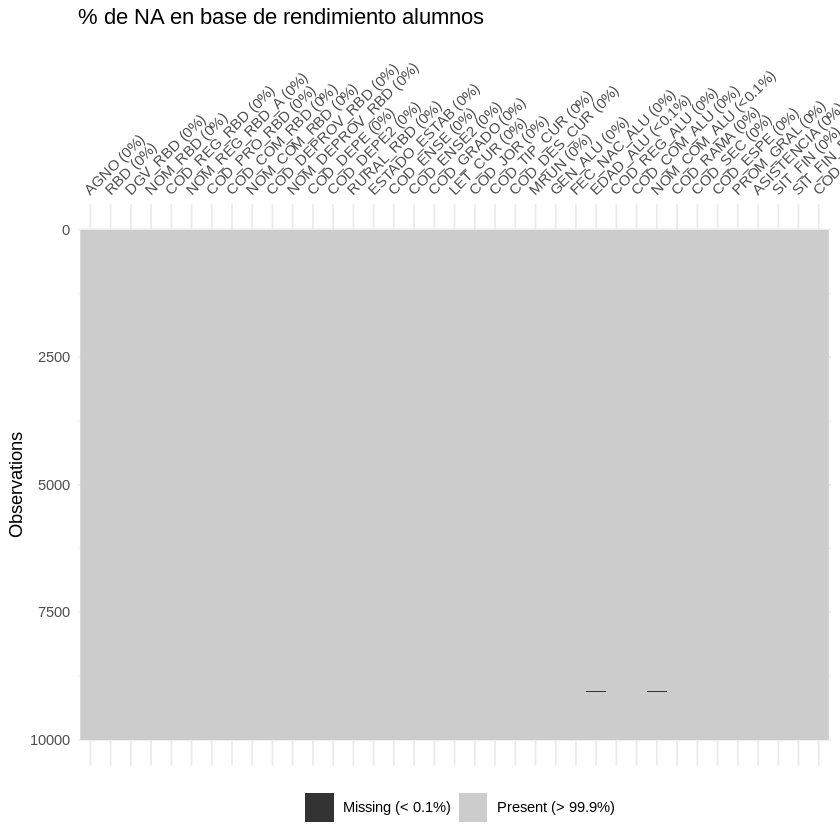

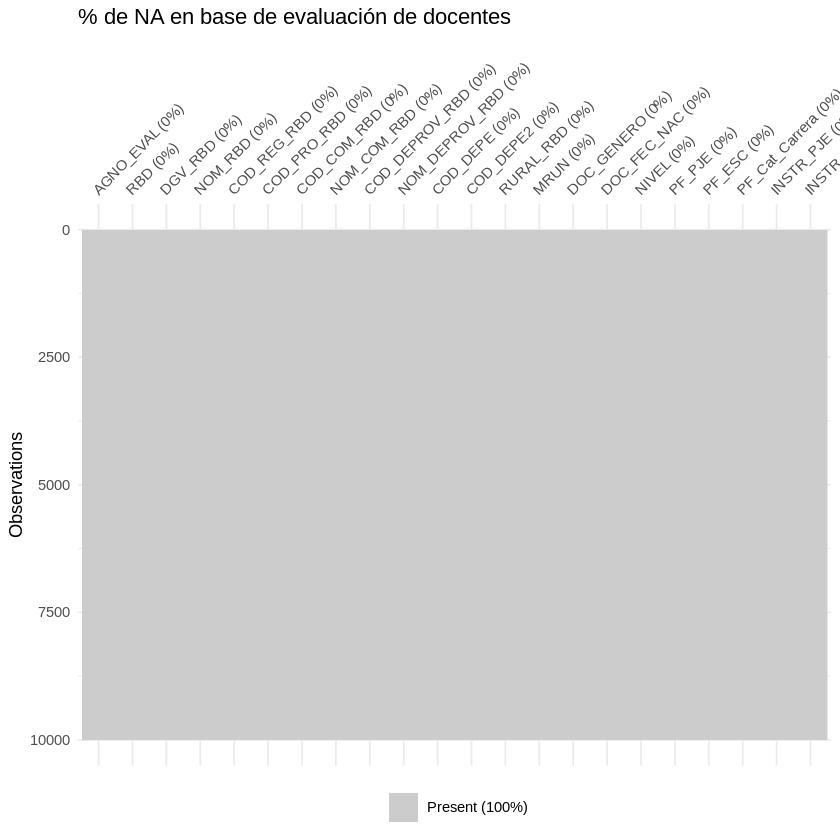

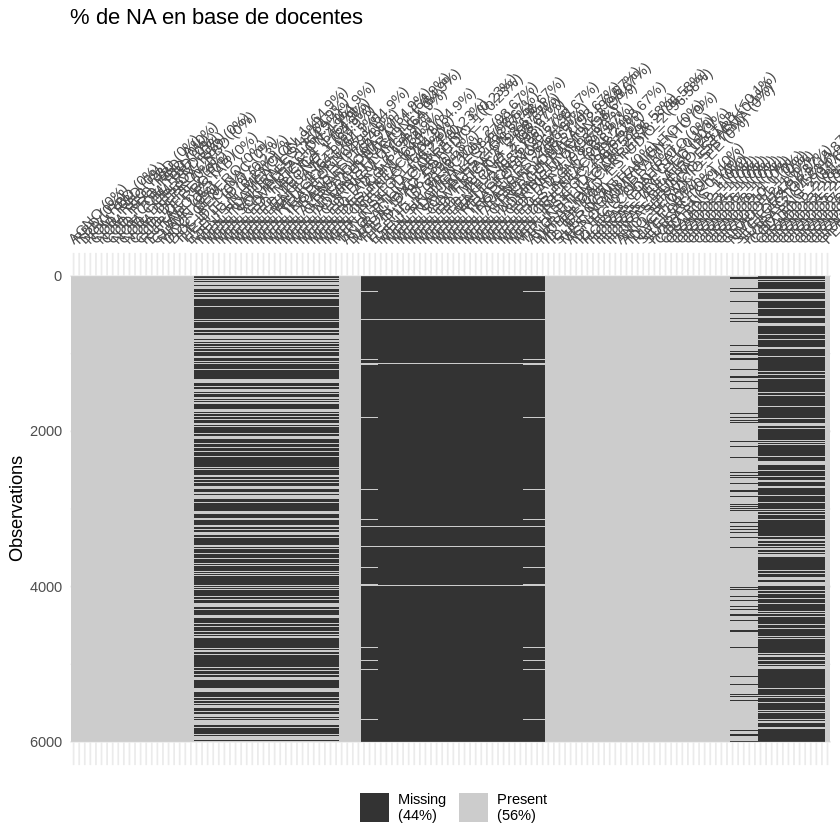

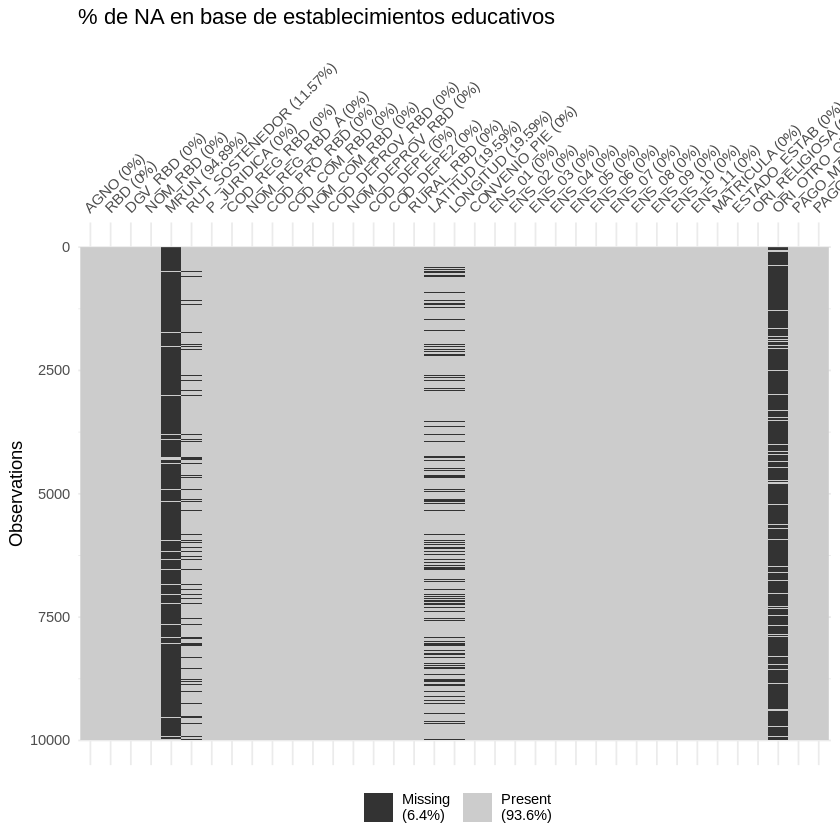

In [ ]:
# La función vis_miss permite visualizar en forma de gráfico la proporción de NA para cada una de las variables
# Tomé una muestra aleatoria de las filas de las bases debido a que si utilizaba todos los registros la 
# sesión del colab fallaba y se reiniciba (por consumo de memoria RAM), sin resultados positivos y teniendo que 
# ejecutar las celdas anteriores nuevamente
vis_miss(rendim2019[sample(1:nrow(rendim2019), 10000, replace=F),]) + labs(title = "% de NA en base de rendimiento alumnos")
vis_miss(evadoc2019[sample(1:nrow(evadoc2019), 10000, replace=F),]) + labs(title = "% de NA en base de evaluación de docentes")
vis_miss(docent2019[sample(1:nrow(docent2019), 6000, replace=F),]) + labs(title = "% de NA en base de docentes")
vis_miss(establ2019[sample(1:nrow(establ2019), 10000, replace=F),]) + labs(title = "% de NA en base de establecimientos educativos")

<p align="justify">La base de docentes y establecimientos son las que tienen mayor porcentajes de NAs en algunas columnas. En el primer caso, se debe a que son variables dummies como MEN_INGLES_2 (tiene mención en inglés) o MEN_ALEMAN_2 (tiene mención en alemán).</p>
<p align="justify">En el segundo caso, MRUN (Máscara RUN del sostenedor -personas naturales) y ORI_OTRO_GLOSA (descripción de otra orientación religiosa) tienen un porcentaje de NAs mayor al 90%, mientras que LATITUD, LONGITUD, y RUT_SOSTENEDOR (solo para personas jurídicas) 20% o menos. La primera situación podría ser normal (mayoría de establecimientos son personas jurídicas y se enmarcan en las opciones religiosas de la base), mientras que la falta de coordenadas en un 20% de los datos resulta un poco mas llamativa.</p>

In [ ]:
# Exploro el tipo de establecimiento (urbano o rural: 0 o 1) en donde hay valores NA para LONGITUD y LATITUD
establ2019[is.na(establ2019$LONGITUD) & is.na(establ2019$LATITUD),] %>% select(RURAL_RBD) %>% table()
# Exploro el tipo de establecimiento (municipal o privado) en donde hay valores NA para LONGITUD y LATITUD
establ2019[is.na(establ2019$LONGITUD) & is.na(establ2019$LATITUD),] %>% select(COD_DEPE2) %>% table()

.
   0    1 
2556  743 

.
   1    2    3    4    5 
1036 1371  890    1    1 

In [ ]:
# Confirmo que todos los docentes evaluados están asociados a un establecimiento por lo menos
evadoc2019[is.na(evadoc2019$RBD),] %>% nrow()

[1] 0

In [ ]:
# Confirmo que hay más de un registro por estudiante en la table de rendimiento escolar
rendim2019 %>% group_by(MRUN) %>% summarise(cant=n()) %>% filter(cant>1) %>% nrow()

[1] 200027

In [ ]:
# Listo primeras filas de MRUNs que tienen mas de un registro en la tabla de rendimiento escolar
# La razón de esto parece ser debido a retiros (SIT_FIN == "Y")
rendim2019 %>% group_by(MRUN) %>% mutate(cant=n()) %>% filter(cant>1) %>% arrange(MRUN) %>% select(RBD, MRUN, PROM_GRAL, COD_ESPE, SIT_FIN) %>% head(5)

RBD,MRUN,PROM_GRAL,COD_ESPE,SIT_FIN
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10911,20,0.0,54018,Y
12712,20,4.9,54018,P
2151,48,0.0,0,Y
20364,48,6.2,0,P
5123,129,5.9,0,P


**Tras análisis preliminar de bases y lectura de esquemas relacionales, listo las hipótesis:**

<ol>
<li>
Los establecimientos privados tienen docentes mejor evaluados que los establecimientos públicos.
</li>
<li>
El desempeño de los docentes tiene relación con el tipo de contratación que éstos tienen.
</li>
<li>
El desempeño de alumnos tiende a ser mejor cuando el desempeño de los docentes también lo es.
</li>
</ol>

<p align="justify">(b) (0.5 Pts) Seleccione tres bases de datos que ayuden a resolver una o más hipótesis planteadas. Explique su elección y con sus propias palabras que contiene cada base de datos seleccionada.<p>


**<p align="justify">Analizando los esquemas relacionales y las bases seleccionadas del mineduc, concluyo que para poder responder las hipótesis planteadas requiero cruzar las siguientes tablas: </p>**
<ul>
<li>Rendimiento Escolar por Estudiante: lista principalmente los resultados del rendimiento de los estudiantes por especialidad. Por tanto pueden existir más de un registro por estudiante. </li>
<li>Evaluación Docente: lista los resultados de las evaluaciones de los docentes que trabajan en establecimientos educativos.</li>
<li>Cargos Docente: lista los docentes que desempeñan algún cargo en los distintos establecimientos.</li>
<li>Directorio Establecimientos Educativos: lista detalles de los establecimientos educativos como su tipo (municipal, privado, etc.), si es urbano o rural, orientación religiosa, coordenadas geográficos,entre otros.</li>
</ul>
<p align="justify"><strong>Hipótesis 1:</strong> Establecimientos con Evaluación de docentes. Aunque el RBD del establecimiento está en la tabla de evaluación de docentes, si quisiera hacer una visualización tipo mapa, la latitud y la longitud solamente están en la tabla establecimiento. Además, para indagar por rango de pagos o por orientación religiosa, se requiere también la tabla de establecimientos.</p>

<p align="justify"><strong>Hipótesis 2:</strong> Evaluación de docentes con Docentes. Variables como el tipo de contrato del docente no están en la tabla de evaluaciones, sino en la docentes.</p>

<p align="justify"><strong>Hipótesis 3:</strong> Rendimiento de alumnos con Evaluación de docentes. El rendimiento del alumno y la evaluación del docente están en tablas separadas.</p>
<br>
<p><strong> Las variables de interés son:</strong></p>
<p><i>Docentes - 2019:</i></p>
<ul> 
  <li>MRUN: Identificador</li>
  <li>DOC_GENERO: Género</li>
  <li>ID_ITC: Identificador del tipo de contrato</li>
  <li>TIP_INSTI_ID_1: Tipo de institución donde obtuvo el primer título</li>
  <li>RBD: Identificador del establecimiento donde enseña</li>
  <li>NOM_REG_RBD_A: Nombre de la región del establecimiento</li>
</ul>
<p><i>Evaluación Docentes - 2019:</i></p>
<ul> 
  <li>MRUN: identificador del docente</li>
  <li>NIVEL: Nivel asociado al RUT/evaluación</li>
  <li>INSTR_PJE: Puntaje Final en base a resultados en instrumentos</li>
  <li>INSTR_ESC: Escala Final en base a resultados en instrumentos</li>
  <li>RBD: Identificador del establecimiento donde enseña</li>
  <li>COD_REG_RBD: Código de la región del establecimiento</li>
</ul>
<p><i>Establecimientos - 2019:</i></p>
<ul> 
  <li>RBD: Identificador</li>
  <li>NOM_RBD: Nombre</li>
  <li>COD_DEPE2: Tipo de establecimiento</li>
  <li>COD_REG_RBD: Código de la región del establecimiento</li>
  <li>NOM_REG_RBD_A: Nombre de la región del establecimiento</li>
  <li>ORI_RELIGIOSA: Orientación religiosa</li>
  <li>PAGO_MATRICULA: Monto pago matrícula</li>
  <li>PASO_MENSUAL: Monto pago mensual</li>
  <li>LONGITUD: Longitud (coordenada)</li>
  <li>LATITUD: Latitud (coordenada)</li>
</ul>
<p><i>Rendimiento Alumnos - 2019:</i></p>
<ul> 
  <li>MRUN: Identificador alumno</li>
  <li>GEN_ALU: Género alumno</li>
  <li>PROM_GRAL: Promedio general anual</li>
  <li>RBD: Identificador del establecimiento educativo</li>
  <li>NOM_REG_RBD_A: Nombre de la región donde se encuentra establecimiento</li>
</ul>




In [ ]:
#Explorando tipos de columnas y valores de variables en las bases seleccionadas
rendim2019 %>% select(MRUN, GEN_ALU, PROM_GRAL, RBD, NOM_REG_RBD_A) %>% head(5) %>% str()
docent2019 %>% select(MRUN, DOC_GENERO, ID_ITC, TIP_INSTI_ID_1, RBD, NOM_REG_RBD_A) %>% head(5) %>% str()
evadoc2019 %>% select(MRUN, NIVEL, INSTR_PJE, INSTR_ESC, RBD, COD_REG_RBD) %>% head(5) %>% str()
establ2019 %>% select(RBD, NOM_RBD, COD_REG_RBD, NOM_REG_RBD_A, ORI_RELIGIOSA, PAGO_MATRICULA, PAGO_MENSUAL, LONGITUD, LATITUD, COD_DEPE2) %>% head(5) %>% str()

tibble [5 × 5] (S3: tbl_df/tbl/data.frame)
 $ MRUN         : num [1:5] 2655917 3738782 8598804 9591749 11883473
 $ GEN_ALU      : num [1:5] 1 2 1 2 2
 $ PROM_GRAL    : num [1:5] 5 0 4.9 0 0
 $ RBD          : num [1:5] 1 1 1 1 1
 $ NOM_REG_RBD_A: chr [1:5] "AYP" "AYP" "AYP" "AYP" ...
tibble [5 × 6] (S3: tbl_df/tbl/data.frame)
 $ MRUN          : num [1:5] 10747952 5205805 13181394 22401015 4678628
 $ DOC_GENERO    : num [1:5] 2 2 1 2 1
 $ ID_ITC        : num [1:5] 1 1 1 1 1
 $ TIP_INSTI_ID_1: num [1:5] 1 1 1 1 1
 $ RBD           : num [1:5] 1 1 1 1 1
 $ NOM_REG_RBD_A : chr [1:5] "AYP" "AYP" "AYP" "AYP" ...
tibble [5 × 6] (S3: tbl_df/tbl/data.frame)
 $ MRUN       : num [1:5] 19803754 14774056 20162323 9861358 20939539
 $ NIVEL      : num [1:5] 7 3 7 3 7
 $ INSTR_PJE  : num [1:5] 2.73 2.96 2.32 1.89 -1
 $ INSTR_ESC  : chr [1:5] "C" "C" "B" "I" ...
 $ RBD        : num [1:5] 968 2716 2123 8548 5923
 $ COD_REG_RBD: num [1:5] 4 6 6 13 9
tibble [5 × 10] (S3: tbl_df/tbl/data.frame)
 $ RBD       

(c) (1 Pt)Compruebe usando R que las bases de datos se pueden mezclar entre si. Es decir, pueden hacer un join entre ellas cuyo resultado es distinto de vacío. Si es que este proceso no entrega la cantidad de tuplas suficiente para estudiar ninguna de las tres hipótesis (o al menos tener confianza del resultado) deberá rehacer los pasos (a), (b) y (c).

**Primero reviso la cantidad de registros únicos que hay en las bases, de acuerdo a los identificadores de cada una.**

In [ ]:
#Número de registros en cada base
nrow(establ2019) 
nrow(rendim2019) 
nrow(evadoc2019) 
nrow(docent2019) 

[1] 16236

[1] 3328915

[1] 21197

[1] 267379

In [ ]:
#Número de registros únicos en las columnas que identifican 
length(unique(establ2019$RBD)) # 16236 == 16236
length(unique(rendim2019$MRUN)) # 3110056 <> 3328915
length(unique(evadoc2019$MRUN)) # 21197 == 21197
length(unique(docent2019$MRUN)) # 250000 <> 267379

[1] 16236

[1] 3110056

[1] 21197

[1] 250000

In [ ]:
# Obtener registros únicos de docentes de acuerdo con guía de la base
docent2019 %>% filter(PERSONAS == 1) %>% nrow()

[1] 250000

**Hago join entre las tablas respecticas y veo la cantidad de registros retornados**

In [ ]:
#Combinando tablas para hipótesis
# Para hipótesis 1-Los establecimientos privados tienen docentes mejor evaluados que los establecimientos públicos
evadoc2019_h1 <- evadoc2019 %>% 
  select(RBD, DGV_RBD, MRUN, INSTR_PJE, INSTR_ESC)
establ2019_h1 <- establ2019 %>% 
  select(RBD, DGV_RBD, ESTADO_ESTAB, LATITUD, LONGITUD, COD_DEPE2, NOM_REG_RBD_A)

h1 <- evadoc2019_h1 %>% 
  left_join(establ2019_h1, by=c("RBD" = "RBD","DGV_RBD" = "DGV_RBD")) # %>%
  # group_by(COD_DEPE2) %>%
  #summarise(NIVEL_PROMEDIO=mean(NIVEL))
h1 %>% nrow()


[1] 21197

In [ ]:
# Para hipótesis 2-El desempeño de los docentes tiene relación con el tipo de contratación que éstos tienen.

evadoc2019_h2 <- evadoc2019 %>% 
  select(RBD, DGV_RBD, MRUN, NIVEL, PF_PJE, INSTR_PJE)
docent2019_h2 <- docent2019 %>% 
  filter(PERSONAS == 1) %>%
  select(MRUN, DOC_GENERO, ID_ITC, TIT_ID_1)

h2 <- docent2019_h2 %>% 
  inner_join(evadoc2019_h2, by=c("MRUN" = "MRUN")) #%>%
  #group_by(ID_ITC) %>%
  #summarise(NIVEL_PROMEDIO=mean(NIVEL))
h2 %>% nrow()

[1] 21111

In [ ]:
# Para hipótesis 3-El desempeño de alumnos tiende a ser mejor cuando el desempeño de los docentes también lo es.
# Hacer los cruces con la base completa de desempeño (mas de 3 millones de registros) genera un crash del colab
# Tomé entonces una muestra aleatoria de 22.000 registros (tamaño similar al de las otras dos bases)
rendim2019_h3 <- rendim2019 %>% 
  filter(!is.na(PROM_GRAL)) %>%
  slice(sample(1:nrow(rendim2019), 22000, replace = FALSE)) %>%
  select(RBD, DGV_RBD, MRUN, PROM_GRAL, COD_DEPE2) 
evadoc2019_h3 <- evadoc2019 %>% 
  filter(!is.na(INSTR_ESC)) %>%
  select(RBD, DGV_RBD, MRUN, INSTR_PJE, INSTR_ESC, NIVEL) 
establ2019_h3 <- establ2019 %>%
  select(RBD, DGV_RBD, ESTADO_ESTAB, LATITUD, LONGITUD, COD_DEPE2, NOM_REG_RBD_A) %>%
  filter(ESTADO_ESTAB == 1)

h3 <- rendim2019_h3 %>% 
  inner_join(evadoc2019_h3, by=c("RBD" = "RBD", "DGV_RBD" = "DGV_RBD")) %>%
  select(RBD, DGV_RBD, MRUN.x, PROM_GRAL, INSTR_PJE, INSTR_ESC, NIVEL,COD_DEPE2) %>%
  inner_join(establ2019_h3, by=c("RBD" = "RBD", "DGV_RBD" = "DGV_RBD")) %>%
  select(RBD, DGV_RBD, MRUN.x, PROM_GRAL, INSTR_PJE, INSTR_ESC, NIVEL, COD_DEPE2.x, NOM_REG_RBD_A, LATITUD, LONGITUD) %>%
  unique()
h3 %>% nrow()

[1] 62914

<p align="justify">(d) (1 Pt) Seleccione una de las tres hipótesis y a través de la visualización 
de información determine si esta pareciese estar acertada o no. Entregue una pequeña conclusión y análisis sobre este mini-estudio.</p>


<strong>Hipótesis seleccionada:
<p align="justify">3-El desempeño de alumnos tiende a ser mejor cuando el desempeño de los docentes también lo es.</p></strong>

In [ ]:
# Renombrar nombres de columnas
h3 <- h3 %>% rename(MRUN=MRUN.x,TIPO_ESTABLECIMIENTO=COD_DEPE2.x,REGION=NOM_REG_RBD_A,PROMEDIO_ESTUDIANTE=PROM_GRAL,NIVEL_DOCENTE=INSTR_ESC)
head(h3)

RBD,DGV_RBD,MRUN,PROMEDIO_ESTUDIANTE,INSTR_PJE,NIVEL_DOCENTE,NIVEL,TIPO_ESTABLECIMIENTO,REGION,LATITUD,LONGITUD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
9706,3,18309736,6.5,2.31,B,5,1,RM,-33.53480,-70.66600
9706,3,18309736,6.5,2.46,B,2,1,RM,-33.53480,-70.66600
9706,3,18309736,6.5,2.40,B,5,1,RM,-33.53480,-70.66600
4163,7,4959973,5.2,2.34,B,4,1,BBIO,-37.47288,-72.34406
4163,7,4959973,5.2,2.55,C,3,1,BBIO,-37.47288,-72.34406
4163,7,4959973,5.2,2.79,C,4,1,BBIO,-37.47288,-72.34406


In [ ]:
# Crear factores 
h3$TIPO_ESTABLECIMIENTO <- as.factor(h3$TIPO_ESTABLECIMIENTO)
h3$NIVEL_DOCENTE <- as.factor(h3$NIVEL_DOCENTE)
h3$REGION <- as.factor(h3$REGION)

In [ ]:
# Reordenar y renombrar niveles de la escala de desempeño de la evaluación docente
h3$NIVEL_DOCENTE <- h3$NIVEL_DOCENTE %>% fct_relevel(c("I","B","C","D","N/A")) %>% fct_recode(Insatisfactorio="I",Básico="B",Competente="C", Destacado="D")

In [ ]:
# Renombrar niveles de la columna tipo de establecimiento
h3$TIPO_ESTABLECIMIENTO <- h3$TIPO_ESTABLECIMIENTO %>% fct_recode(Municipal="1",Particular_Subvencionado="2",Particular_Pagado="3",Corporación="4",Servicio_Local="5")

Warning message:
“Unknown levels in `f`: 3”


Saving 6.67 x 6.67 in image



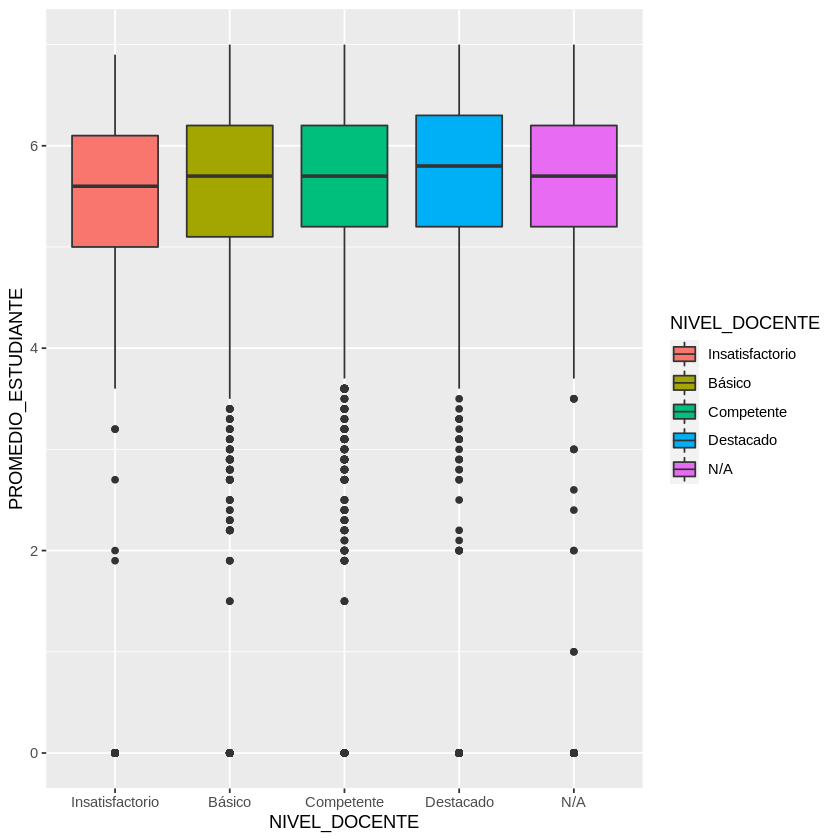

In [ ]:
# Gráfico 1:
# Promedio estudiantes vs nivel de desempeño del docente.
# Los niveles de desempeño de la evaluación docente están detallados aquí: 
# https://www.docentemas.cl/pages/conozca-la-evaluacion/niveles-de-desempeno
# Destacado (D), Competente (C), Básico (B), Insatisfactorio (I)
h3 %>% ggplot(aes(x=NIVEL_DOCENTE,y=PROMEDIO_ESTUDIANTE, fill=NIVEL_DOCENTE)) +
geom_boxplot() 
ggsave("promedio_estudiante_vs_desempeño_docente.png")

<p align="justify">En este punto es interesante resaltar que la base de evaluación de docentes tiene N/A que no son reconocidos por la función is.na(), por lo que no los identifiqué hasta que realicé el gráfico anterior.</p>

In [ ]:
# función is.na() no reconoce N/A de la columna INSTR_ESC
table(is.na(evadoc2019$INSTR_ESC))


FALSE 
21197 

In [ ]:
# la función table resulta ser más útil para identificar en este caso los N/A que constituyen casi un 20%
# de los datos.
round(prop.table(table(evadoc2019$INSTR_ESC)) * 100, 2)


    B     C     D     I   N/A 
20.76 53.38  6.19  1.03 18.65 

In [ ]:
# Promedio estudiantes agrupado por nivel de desempeño del docente
h3 %>% group_by(NIVEL_DOCENTE) %>% summarise(PROM_ESTU=mean(PROMEDIO_ESTUDIANTE, na.rm = T))

NIVEL_DOCENTE,PROM_ESTU
<fct>,<dbl>
Insatisfactorio,4.984025
Básico,5.114954
Competente,5.232361
Destacado,5.331373
N/A,5.189870


Saving 6.67 x 6.67 in image



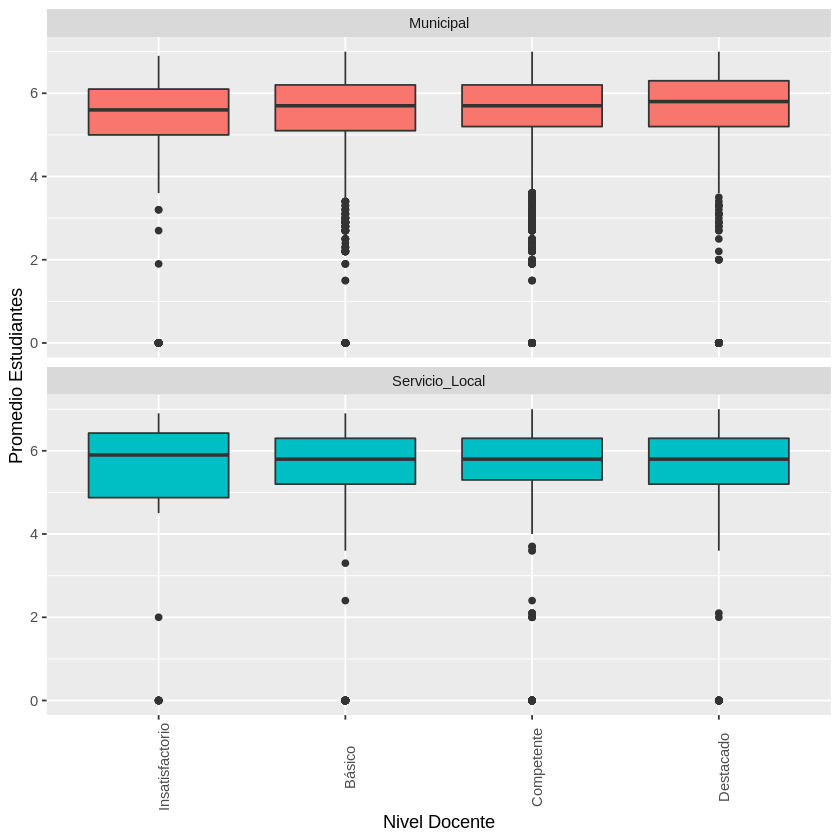

In [ ]:
library(ggplot2)
# Gráfico 2:
# Promedio general de estudiantes (PROM_GRAL) vs el nivel de desempeño de los docentes (INSTR_ESC), 
# por tipo de establecimiento (COD_DEPE2)
g1h3 <- ggplot(data=h3 %>% filter(NIVEL_DOCENTE != "N/A"), aes(x=NIVEL_DOCENTE, y=PROMEDIO_ESTUDIANTE,fill=TIPO_ESTABLECIMIENTO)) +
  geom_boxplot() +
  xlab("Nivel Docente") +
  ylab("Promedio Estudiantes") +
  theme(axis.text.x = element_text(angle = 90), legend.position = "none") +
  facet_wrap(~ TIPO_ESTABLECIMIENTO, nrow = 3)
g1h3
ggsave("analisis_por_tipo_establecimiento.png")

Continuando con análisis de la hipótesis, creo algunas tablas de información con datos agrupados.

In [ ]:
# Promedio estudiantes agrupado por tipo de establecimiento y nivel docente
h3 %>% filter(NIVEL_DOCENTE != "N/A") %>% group_by(TIPO_ESTABLECIMIENTO, NIVEL_DOCENTE) %>% summarise(PROM_ESTU=mean(PROMEDIO_ESTUDIANTE, na.rm = T)) 

`summarise()` has grouped output by 'TIPO_ESTABLECIMIENTO'. You can override using the `.groups` argument.



TIPO_ESTABLECIMIENTO,NIVEL_DOCENTE,PROM_ESTU
<fct>,<fct>,<dbl>
Municipal,Insatisfactorio,4.991108
Municipal,Básico,5.110127
Municipal,Competente,5.222955
Municipal,Destacado,5.330419
Servicio_Local,Insatisfactorio,4.903125
Servicio_Local,Básico,5.172429
Servicio_Local,Competente,5.353089
Servicio_Local,Destacado,5.342582


Saving 6.67 x 6.67 in image



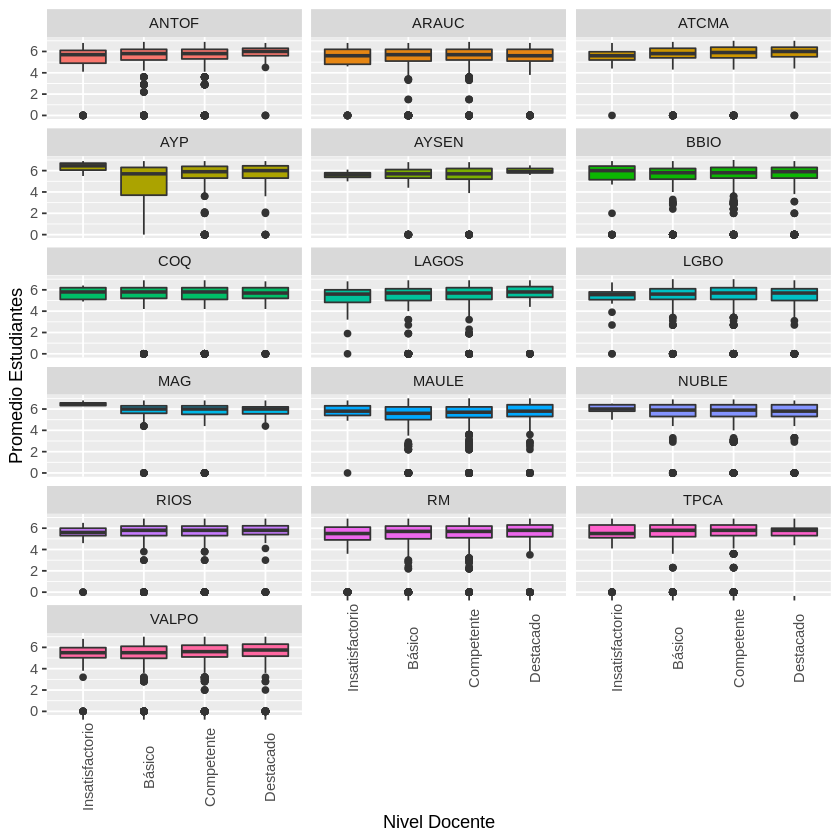

In [ ]:
# Gráfico 3
# Sigue gráfico de desempeño escolar vs nivel de desempeño docente, por región
g2h3 <- ggplot(data=h3 %>% filter(NIVEL_DOCENTE != "N/A"), aes(x=NIVEL_DOCENTE, y=PROMEDIO_ESTUDIANTE,fill=REGION)) +
  geom_boxplot() +
  xlab("Nivel Docente") +
  ylab("Promedio Estudiantes") +
  theme(axis.text.x = element_text(angle = 90), legend.position = "none") +
  facet_wrap(vars(REGION), nrow = 6) 
g2h3
ggsave("analisis_por_region.png")

In [ ]:
# Promedio estudiantes agrupado por región y nivel docente
h3 %>% filter(NIVEL_DOCENTE != "N/A") %>% group_by(REGION, NIVEL_DOCENTE) %>% summarise(PROM_ESTU=mean(PROMEDIO_ESTUDIANTE, na.rm = T)) %>% head(10)

`summarise()` has grouped output by 'REGION'. You can override using the `.groups` argument.



REGION,NIVEL_DOCENTE,PROM_ESTU
<fct>,<fct>,<dbl>
ANTOF,Insatisfactorio,4.762121
ANTOF,Básico,5.354414
ANTOF,Competente,5.396453
ANTOF,Destacado,5.735714
ARAUC,Insatisfactorio,4.960656
ARAUC,Básico,5.173421
ARAUC,Competente,5.216713
ARAUC,Destacado,5.147328
ATCMA,Insatisfactorio,5.373077


**<p align="justify">En relación con la hipótesis seleccionada, si bien en general el desempeño de los estudiantes en promedio es mayor a medida que el nivel de desempeño docente también aumenta (gráfico 1), las diferencias son muy pequeñas y hacen dudar sobre la existencia de una correlación entre las variables. Se crearon entonces gráficos por tipo de establecimiento (gráfico 2) y por región (gráfico 3), además de tablas resúmenes, de los cuales fue posible concluir que aparentemente no existe una relación entre ambas variables (desempeño de docentes y promedio de estudiantes).</p>**

In [ ]:
# Tabla de correlaciones entre variables numéricas
cor(select_if(h3, is.numeric))

,RBD,DGV_RBD,MRUN,PROMEDIO_ESTUDIANTE,INSTR_PJE,NIVEL,LATITUD,LONGITUD
RBD,1.00000000,0.012211191,1.359632e-02,-0.028151122,-0.234241637,-4.489439e-02,-0.210852926,0.022139985
DGV_RBD,0.01221119,1.000000000,-2.050754e-02,0.010904795,0.021333240,1.543695e-02,-0.004377254,-0.005741532
MRUN,0.01359632,-0.020507538,1.000000e+00,-0.006890865,-0.002389019,1.164392e-05,0.065024516,0.049901867
PROMEDIO_ESTUDIANTE,-0.02815112,0.010904795,-6.890865e-03,1.000000000,0.013172329,-8.005581e-02,0.004312324,-0.007522575
INSTR_PJE,-0.23424164,0.021333240,-2.389019e-03,0.013172329,1.000000000,1.327403e-01,-0.010159407,0.003678720
NIVEL,-0.04489439,0.015436955,1.164392e-05,-0.080055815,0.132740282,1.000000e+00,0.011388327,-0.007945356
LATITUD,-0.21085293,-0.004377254,6.502452e-02,0.004312324,-0.010159407,1.138833e-02,1.000000000,0.444893138
LONGITUD,0.02213999,-0.005741532,4.990187e-02,-0.007522575,0.003678720,-7.945356e-03,0.444893138,1.000000000


<p align="justify">Si la variable NIVEL_DOCENTE (originalmente INSTR_ESC -Escala de resultado asignada al docente con base en los instrumentos aplicados) está asociada al INSTR_PJE (Puntaje de la evaluación con base en los instrumentos aplicados), asumiendo que la primera fue calculada con base en la segunda, sería válido establecer que si el promedio del estudiante no tiene relación con la variable INSTR_PJE tampoco la tendrá con INSTR_ESC.</p>
<p align="justify"> Por lo tanto, de la tabla de correlaciones anterior podemos asegurar que no existe una relación entre las variables estudiadas en la hipótesis 3. </P> 